In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
customers.isnull().all() #check if there's any NULL value in any of the columns

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [13]:
customers.dtypes #gender is my categorical variable

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [77]:
customers.shape

(200, 5)

Text(0.5, 1.0, 'Distribution of Genders')

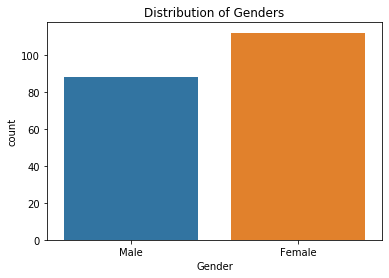

In [22]:
sns.countplot(x='Gender', data=customers)
plt.title('Distribution of Genders')
#more females than males in this dataset

Text(0.5, 0, 'Age')

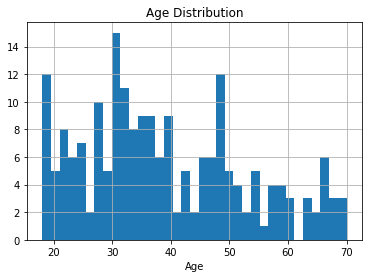

In [52]:
customers.hist('Age',bins=35)
plt.title('Age Distribution')
plt.xlabel('Age')
#most age seems to lie in between 30-40 (mean was 38)
#implies less older customers come to this mall
#longer tail to the right of distribution -> right skewed distribution

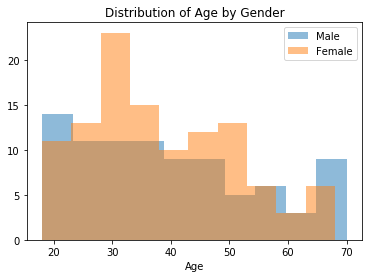

In [51]:
#creating a histogram for each gender based on their age
plt.hist('Age',data=customers[customers['Gender'] == 'Male'],alpha=0.5, label='Male');
plt.hist('Age', data = customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()
#spike for women at 30-35 age, more middle aged women (40-55) than men, increase in men around 65-70 age

Text(0.5, 0, 'Thousands of Dollars')

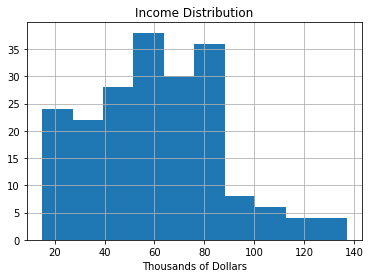

In [58]:
customers.hist('Annual Income (k$)')
plt.title('Income Distribution')
plt.xlabel('Thousands of Dollars')
#much of the income is in the 60-80 thousand dollar bucket

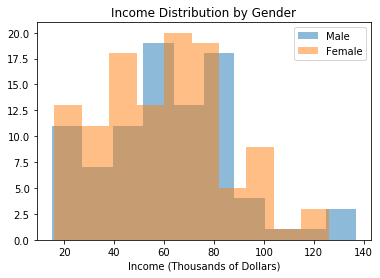

In [60]:
plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Female'], alpha=0.5, label = 'Female')
plt.title('Income Distribution by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend()
#most females are in the 60-80 income bucket 

In [61]:
#now looking at their spending scores
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

#average spending score based on each gender
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())
#females have a larger spending score compared to the men

48.51136363636363
51.526785714285715


Text(0.5, 1.0, 'Age to Income Colored by Gender')

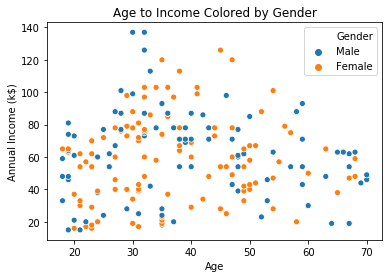

In [63]:
#looking at a couple f scatterplots

sns.scatterplot('Age','Annual Income (k$)', hue='Gender', data=customers);
plt.title('Age to Income Colored by Gender')
# no clear correlation but use heatmap to check it out once

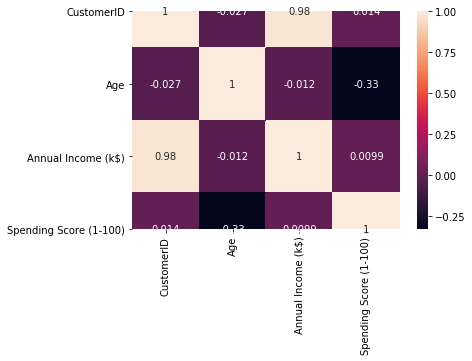

In [79]:
sns.heatmap(customers.corr(),annot=True)

Text(0.5, 1.0, 'Age to Spending Score')

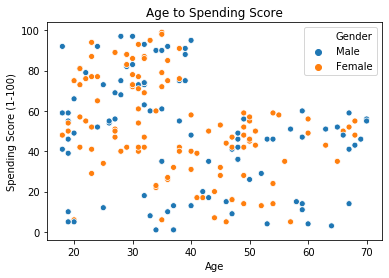

In [71]:
sns.scatterplot('Age','Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Age to Spending Score')
# slight negative correlation, where the older the age, the less the spending score

Text(0.5, 1, 'Correlation for Female Customers')

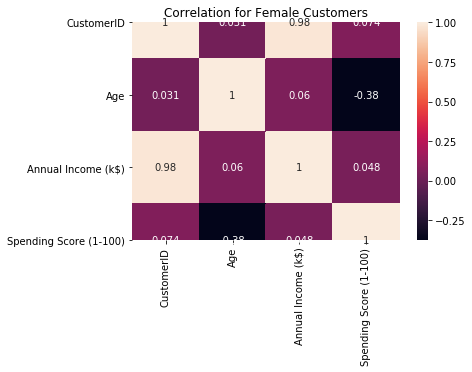

In [72]:
sns.heatmap(female_customers.corr(), annot=True)
plt.title('Correlation for Female Customers')

Text(0.5, 1, 'Correlation for Male customers')

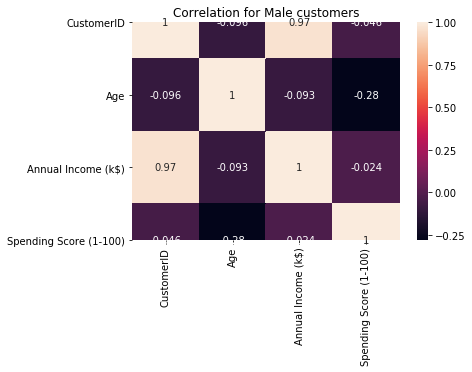

In [73]:
sns.heatmap(male_customers.corr(),annot=True)
plt.title('Correlation for Male customers')
#age effects more spending score for women than men, however the correlations are weak so not much can be stated about it

Text(0.5, 1, 'Age to Spending Score, Females')

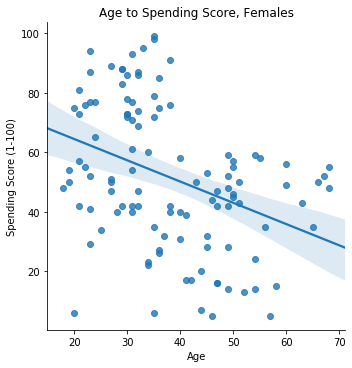

In [74]:
sns.lmplot('Age','Spending Score (1-100)', data=female_customers)
plt.title('Age to Spending Score, Females')

Text(0.5, 1.0, 'Income to Spending Score')

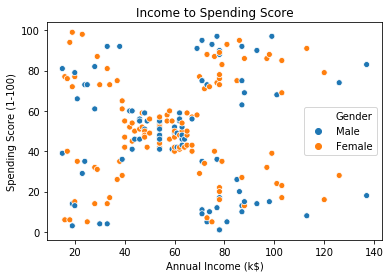

In [75]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Income to Spending Score')